<h2>
Nama Tsania Candraningtyas
NIM : 0706022310055
</h2>

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from kneed import KneeLocator
import seaborn as sns

# Exploratory Data Analysis

In [87]:
# load dataset
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/mall_customers.csv"
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [89]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [90]:
# rename the Income($)	column
df = df.rename(columns={"Annual Income (k$)": "Income"})
df = df.rename(columns={"Spending Score (1-100)": "Spending Score"})
df.head()

,CustomerID,Gender,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [91]:
print(df.columns.tolist())

['CustomerID', 'Gender', 'Age', 'Income', 'Spending Score']


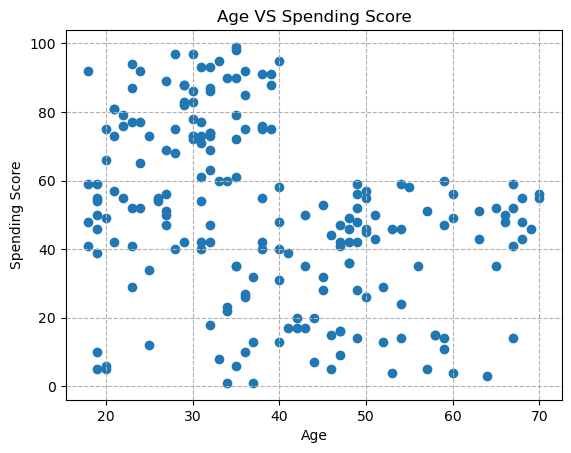

In [92]:
plt.scatter(df['Age'], df['Spending Score'])
plt.title('Age VS Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

<h4>
mengidentifikasi kelompok umur mana yang paling banyak membelanjakan uangnya. pelanggan yang lebih muda (misalnya, berusia 20–35 tahun) memiliki skor pembelanjaan yang lebih tinggi, sedangkan pelanggan yang lebih tua membelanjakan lebih sedikit.
</h4>

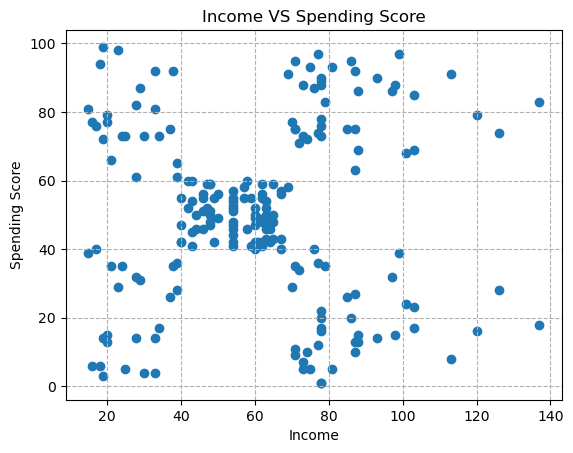

In [93]:
plt.scatter(df['Income'], df['Spending Score'])
plt.title('Income VS Spending Score')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.grid(axis='both', linestyle='--')
plt.show()

<h4>
apakah pendapatan yang lebih tinggi menyebabkan pengeluaran yang lebih tinggi. pelanggan dengan pendapatan menengah memiliki skor pembelanjaan tertinggi, yang menunjukkan bahwa perilaku pembelanjaan tidak selalu sejalan dengan pendapatan 
</h4>

In [94]:
# create new dataframe that consist only annual income and spending score
df = df[['Spending Score', 'Age','Income']]
df.head()

,Spending Score,Age,Income
0,39,19,15
1,81,21,15
2,6,20,16
3,77,23,16
4,40,31,17


# Data Scaling (Choose One)

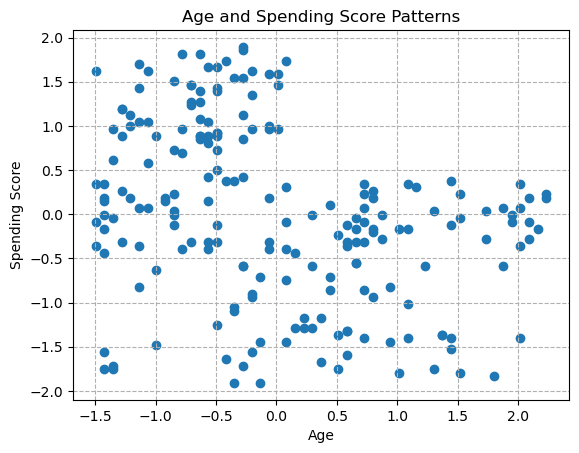

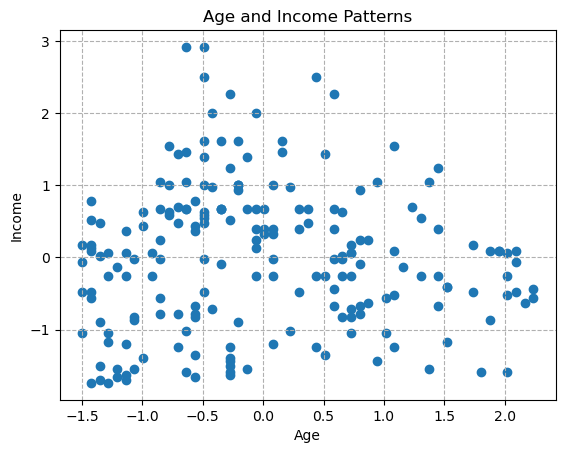

In [96]:
# scale dataset with standard scaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_sc_scaled = pd.DataFrame(sc.fit_transform(df), columns=['Spending Score', 'Age','Income'])

df_sc_scaled.head()

# visualization
plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Spending Score"])
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Spending Score Patterns")
plt.show()

plt.scatter(df_sc_scaled["Age"], df_sc_scaled["Income"])
plt.xlabel("Age")
plt.ylabel("Income")
plt.grid(axis='both', linestyle='--')
plt.title("Age and Income Patterns")
plt.show()

# K-Means Clustering

In [97]:
from sklearn.cluster import KMeans

c:\Users\asus new\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asus new\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asus new\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\asus new\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory le

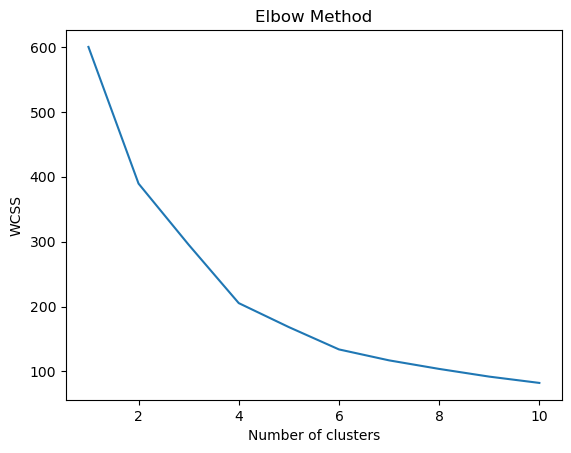

In [98]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_sc_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [99]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters        WCSS
0                   1  600.000000
1                   2  389.386189
2                   3  295.212246
3                   4  205.225147
4                   5  168.247580
5                   6  133.868334
6                   7  117.011555
7                   8  103.828578
8                   9   91.956839
9                  10   82.245745


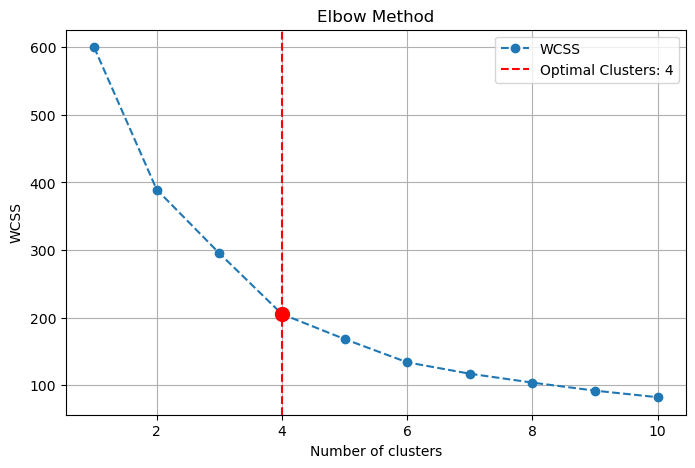

The optimal number of clusters is: 4


In [100]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

In [101]:
# Fit K-Means to the data with the optimal number of K cluster = 3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df_sc_scaled)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = clusters

# Show the df
df.head()

c:\Users\asus new\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Spending Score,Age,Income,KMeans_Cluster
0,39,19,15,2
1,81,21,15,2
2,6,20,16,0
3,77,23,16,2
4,40,31,17,0


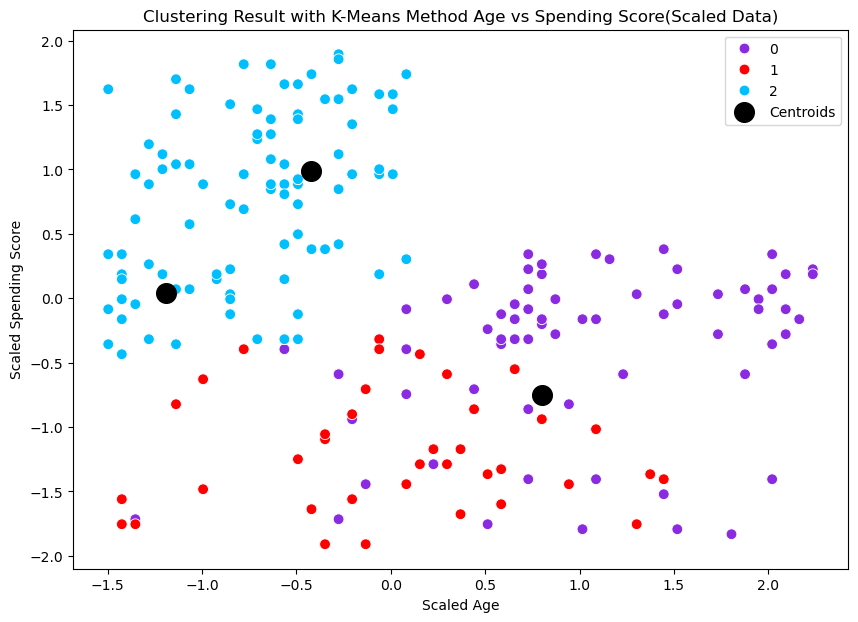

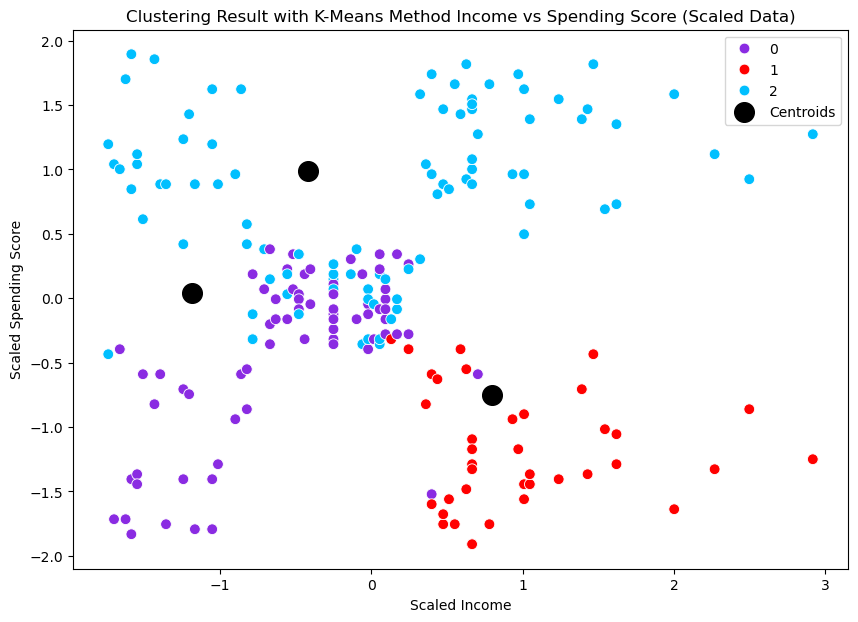

In [105]:
# visualize the result using scater chart on scaled data
plt.figure(figsize=(10,7))
sns.scatterplot(x = "Age", y = "Spending Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method Age vs Spending Score(Scaled Data)")
plt.legend()
plt.show()

plt.figure(figsize=(10,7))
sns.scatterplot(x = "Income", y = "Spending Score", hue=clusters, palette=["blueviolet", "red", "deepskyblue"], data=df_sc_scaled, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c="black", label="Centroids")
plt.xlabel("Scaled Income")
plt.ylabel("Scaled Spending Score")
plt.title("Clustering Result with K-Means Method Income vs Spending Score (Scaled Data)")
plt.legend()
plt.show()

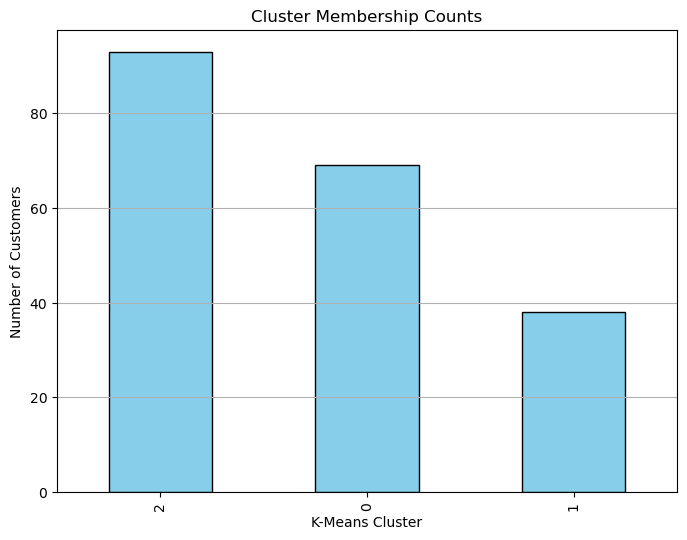

In [106]:
cluster_counts = df['KMeans_Cluster'].value_counts()

plt.figure(figsize=(8, 6))
cluster_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Cluster Membership Counts')
plt.xlabel('K-Means Cluster')
plt.ylabel('Number of Customers')
plt.grid(axis='y')
plt.show()


In [108]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(clusters).agg({'Age': ['mean', 'min', 'max'],
                                              'Income': ['mean', 'min', 'max'],
                                              'Spending Score': ['mean', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('KMeans_cluster')

cluster_summary

Age             Income          Spending Score        
                     mean min max       mean min  max           mean min max
KMeans_cluster                                                              
0               52.608696  20  70  46.072464  16   79      39.333333   3  60
1               39.368421  19  59  86.500000  64  137      19.578947   1  42
2               28.430108  18  40  60.709677  15  137      70.774194  39  99

Cluster 0 = Konsumen Muda dengan Pendapatan Menengah

Profil:

Usia rata-rata sekitar 28 tahun (umumnya 26–32 tahun).

Memiliki pendapatan menengah (~58 juta/tahun).

Biasanya masih di tahap awal karier, cukup sensitif terhadap harga, dan sedang membangun kestabilan finansial.

Implikasi:

Fokus pada produk dengan harga terjangkau atau versi basic/entry-level.

Gunakan pemasaran digital seperti media sosial atau influencer karena mereka aktif secara online.

Tawarkan program loyalitas atau diskon bundling untuk menjaga hubungan jangka panjang.

Gunakan pesan promosi yang menonjolkan gaya hidup, aspirasi, dan semangat anak muda.

Cluster 1 = Profesional Dewasa dengan Pendapatan Tinggi

Profil:

Rata-rata usia antara 35–42 tahun.

Kelompok dengan pendapatan tertinggi (~150 juta/tahun).

Sudah mapan dalam karier, memiliki daya beli kuat, dan lebih suka kualitas serta kenyamanan.

Implikasi:

Tawarkan produk premium atau layanan eksklusif seperti keanggotaan VIP dan pengalaman personal.

Gunakan pesan pemasaran yang menekankan status, kualitas, dan kenyamanan.

Bangun program retensi pelanggan yang berfokus pada kepercayaan dan konsistensi merek.

Kelompok ini cocok untuk strategi cross-selling dan upselling karena nilai pelanggan jangka panjangnya tinggi.

Cluster 2 = Konsumen Dewasa-Menengah dengan Pendapatan Sedang

Profil:

Usia rata-rata sekitar 39–43 tahun.

Memiliki pendapatan menengah (~68 juta/tahun).

Umumnya sudah berada di tahap karier stabil, namun memiliki tanggungan keluarga atau cicilan.

Implikasi:

Tawarkan paket bernilai tinggi (value for money), seimbang antara kualitas dan harga.

Gunakan pesan promosi yang menekankan kepercayaan, keamanan, dan manfaat praktis (misalnya daya tahan atau layanan purna jual).

Cocok untuk kampanye yang berfokus pada keluarga.

Sediakan opsi cicilan atau pembayaran fleksibel untuk mempermudah keputusan pembelian.